In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
    weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))
    bias_hidden = np.zeros((1, hidden_size))
    bias_output = np.zeros((1, output_size))
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

def forward_propagation(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = relu(output_layer_input)
    
    return hidden_layer_input, hidden_layer_output, predicted_output

def backward_propagation(X, y, hidden_layer_input, hidden_layer_output, predicted_output,
                         weights_hidden_output, bias_hidden, bias_output):
    output_error = y - predicted_output
    output_delta = output_error * relu_derivative(predicted_output)
    
    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * relu_derivative(hidden_layer_output)
    
    return output_delta, hidden_layer_delta

def update_weights(X, hidden_layer_output, output_delta, hidden_layer_delta, 
                   weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate):
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate


def train_neural_network_with_validation(X_train, y_train, X_val, y_val, hidden_size, epochs, learning_rate):
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    
    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = initialize_weights(input_size, hidden_size, output_size)
    
    for epoch in range(epochs):
        # Training phase
        hidden_layer_input, hidden_layer_output, predicted_output = forward_propagation(X_train, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
        output_delta, hidden_layer_delta = backward_propagation(X_train, y_train, hidden_layer_input, hidden_layer_output, predicted_output, weights_hidden_output, bias_hidden, bias_output)
        update_weights(X_train, hidden_layer_output, output_delta, hidden_layer_delta, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate)
        
        # Validation phase
        _, _, val_output = forward_propagation(X_val, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
        val_loss = np.mean(np.abs(y_val - val_output))
        
        if epoch % 1000 == 0:
            train_loss = np.mean(np.abs(output_delta))
            print(f"Epoch: {epoch}, Training Loss: {train_loss}, Validation Loss: {val_loss}")

    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output


def predict(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    _, _, predicted_output = forward_propagation(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
    return predicted_output

# Define input data and output labels
data = np.array([(0.0502179742253,0.0742491491850), 
                 (0.8290606534771,0.2403834050136), 
                 (1.9906392014367,0.9795697537151), 
                 (3.1733373593591,3.0704111400422),
                 (3.8965780427014,4.5027741153818), 
                 (4.5215257741621,5.3200134565227), 
                 (5.3868380177231,5.3921228101528), 
                 (6.0358222003939,4.5027741153818), 
                 (6.4925147733844,2.2193112504291),
                 (7.7664466875159,0.5607961169372),
                 (8.9923056992273,0.4406138608871),
                 (10.1460553573086,0.344468056047),
                 (10.9453538257065,0.2615030149765),])

X = data[:, 0].reshape(-1, 1)  # Input column
y = data[:, 1].reshape(-1, 1)  # Output column

# Normalize input data
X_normalized = X / np.max(X)

# Train the neural network
hidden_size = 4
epochs = 10000
learning_rate = 0.1

weights_input_hidden, weights_hidden_output = train_neural_network(X_normalized, y, hidden_size, epochs, learning_rate)


Epoch: 0, Loss: 1.9315520203172232
Epoch: 1000, Loss: 0.0
Epoch: 2000, Loss: 0.0
Epoch: 3000, Loss: 0.0
Epoch: 4000, Loss: 0.0
Epoch: 5000, Loss: 0.0
Epoch: 6000, Loss: 0.0
Epoch: 7000, Loss: 0.0
Epoch: 8000, Loss: 0.0
Epoch: 9000, Loss: 0.0


ValueError: too many values to unpack (expected 2)

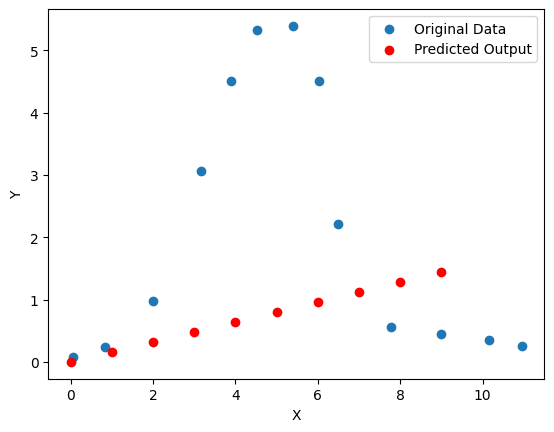

In [28]:
X_new = np.array([[n for n in range(10)]]).T
X_new_normalized = X_new / np.max(X)

predicted_output = predict(X_new_normalized, weights_input_hidden, weights_hidden_output)

# Plot the original data and the predicted values
plt.scatter(X, y, label='Original Data')
plt.scatter(X_new[:, 0], predicted_output, color='r', label='Predicted Output')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

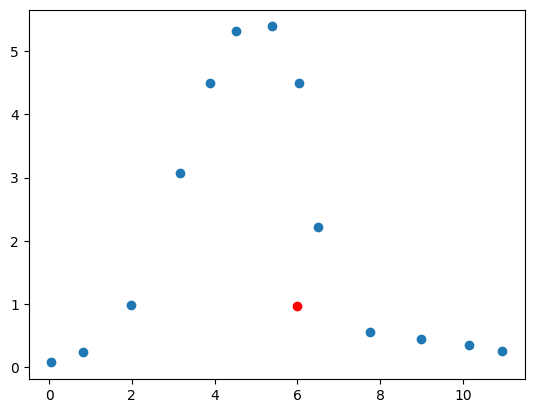

In [26]:
X_new = np.array([[6]])  # Example new input
X_new_normalized = X_new / np.max(X)
predicted_output = predict(X_new_normalized, weights_input_hidden, weights_hidden_output)

# print("Predicted Output:", predicted_output)
plt.scatter(X, y)
plt.scatter(X_new, predicted_output, color='r')
plt.show()